In [1]:

import numpy as np

# Simulated network traffic data (packet sizes in bytes)
network_traffic = [40, 40, 45, 50, 55, 500, 45, 50, 60, 55]  # Anomalous 500

# Calculate entropy
def calculate_entropy(data):
    values, counts = np.unique(data, return_counts=True)
    probabilities = counts / len(data)
    return -np.sum(probabilities * np.log2(probabilities))

entropy_before = calculate_entropy(network_traffic[:-1])  # Normal traffic
entropy_after = calculate_entropy(network_traffic)  # With anomaly

print(f"Entropy before anomaly: {entropy_before:.4f}")
print(f"Entropy after anomaly: {entropy_after:.4f}")



Entropy before anomaly: 2.5033
Entropy after anomaly: 2.5219


In [2]:

from sklearn.feature_selection import mutual_info_classif
import numpy as np

# Simulated dataset (features and labels)
X = np.array([[1, 0], [0, 1], [1, 1], [0, 0], [1, 0]])  # Features
y = np.array([0, 1, 1, 0, 0])  # Labels

# Calculate mutual information
mi = mutual_info_classif(X, y, discrete_features=True)
print(f"Mutual Information between features and labels: {mi}")



Mutual Information between features and labels: [0.01384429 0.67301167]


In [3]:

# Simulate key distribution (probabilities of each key being used)
key_distribution = [0.7, 0.2, 0.1]


key_entropy = -np.sum([p * np.log2(p) for p in key_distribution])
print(f"Entropy of key distribution: {key_entropy:.4f} bits")



Entropy of key distribution: 1.1568 bits


In [4]:

def calculate_file_entropy(file_data):
    """Calculate Shannon entropy of a binary file."""
    byte_counts = np.bincount(np.frombuffer(file_data, dtype=np.uint8), minlength=256)
    probabilities = byte_counts / len(file_data)
    probabilities = probabilities[probabilities > 0]  # Filter non-zero probabilities
    return -np.sum(probabilities * np.log2(probabilities))

# Simulated binary file (random bytes)
file_data = np.random.randint(0, 256, size=1024, dtype=np.uint8).tobytes()

file_entropy = calculate_file_entropy(file_data)
print(f"File Entropy: {file_entropy:.4f} bits")



File Entropy: 7.8413 bits


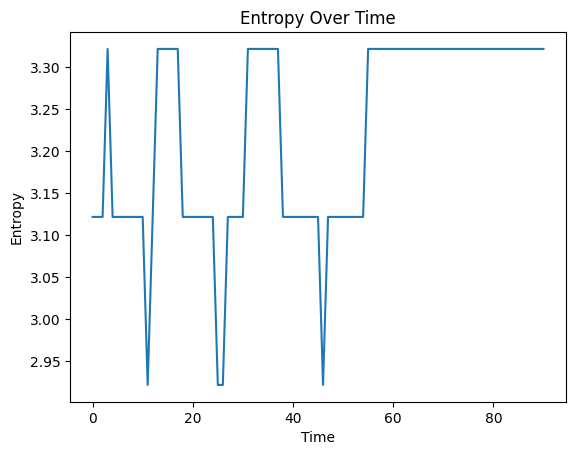

In [5]:

import matplotlib.pyplot as plt

# Generate random data and calculate entropy over a sliding window
data = np.random.randint(1, 100, 100)
window_size = 10
entropies = [calculate_entropy(data[i:i+window_size]) for i in range(len(data) - window_size + 1)]

# Plot entropy over time
plt.plot(entropies)
plt.title("Entropy Over Time")
plt.xlabel("Time")
plt.ylabel("Entropy")
plt.show()



In [8]:

# Quantum entropy calculation (von Neumann entropy)
def quantum_entropy(density_matrix):
    """Calculate von Neumann entropy from a density matrix."""
    eigenvalues = np.linalg.eigvals(density_matrix)
    eigenvalues = eigenvalues[eigenvalues > 0]  # Filter out zero eigenvalues
    return -np.sum(eigenvalues * np.log2(eigenvalues))

# Example density matrix (random Hermitian positive-definite matrix)
density_matrix = np.array([[0.5, 0.1], [0.1, 0.5]])
quantum_entropy_value = quantum_entropy(density_matrix)
print(f"Quantum Entropy: {quantum_entropy_value:.4f}")



Quantum Entropy: 0.9710


In [11]:

# Simulated probabilities of data exposure in different scenarios
exposure_probabilities = [0.6, 0.3, 0.1]

# Calculate entropy to quantify uncertainty about data exposure
exposure_entropy = -np.sum([p * np.log2(p) for p in exposure_probabilities])
print(f"Data Exposure Entropy: {exposure_entropy:.4f} bits")



Data Exposure Entropy: 1.2955 bits


In [12]:

import numpy as np

# Adding Laplace noise for differential privacy
def add_laplace_noise(value, sensitivity, epsilon):
    """Add Laplace noise to a value for differential privacy."""
    noise = np.random.laplace(0, sensitivity / epsilon)
    return value + noise

# Original value and sensitivity
original_value = 100  # e.g., a count of events
sensitivity = 1
epsilon = 0.5

noisy_value = add_laplace_noise(original_value, sensitivity, epsilon)
print(f"Original Value: {original_value}")
print(f"Noisy Value (Differential Privacy): {noisy_value}")



Original Value: 100
Noisy Value (Differential Privacy): 98.63593838152545


In [13]:

from sklearn.metrics import mutual_info_score

# Simulated network traffic patterns (categorical data)
traffic_pattern_1 = [1, 2, 1, 2, 3, 1]
traffic_pattern_2 = [2, 2, 1, 2, 3, 2]

# Calculate mutual information between two traffic patterns
mi_score = mutual_info_score(traffic_pattern_1, traffic_pattern_2)
print(f"Mutual Information between traffic patterns: {mi_score:.4f}")



Mutual Information between traffic patterns: 0.5493


In [14]:

# Simulated probabilities and anomaly scores
probabilities  = np.random.dirichlet(np.ones(5), size=1)[0]
anomaly_scores = np.random.uniform(0, 1, size=5)

# Combine entropy and anomaly score for a composite metric
composite_metric = [p * s for p, s in zip(probabilities, anomaly_scores)]
print("Composite Metric for Threat Detection:")
print(composite_metric)



Composite Metric for Threat Detection:
[0.03563343937184099, 0.27471274129703743, 0.03325948156169116, 0.04815319443078058, 0.04285886833630531]


In [15]:

# Joint distribution of two events
joint_distribution = np.array([
    [0.1, 0.2],  # P(X=0, Y=0) and P(X=0, Y=1)
    [0.3, 0.4]   # P(X=1, Y=0) and P(X=1, Y=1)
])

# Calculate joint entropy
joint_entropy = -np.sum(joint_distribution * np.log2(joint_distribution[joint_distribution > 0]))
print(f"Joint Entropy: {joint_entropy:.4f} bits")



ValueError: operands could not be broadcast together with shapes (2,2) (4,) 

In [16]:

# P(X|Y) = P(X and Y) / P(Y)
marginal_y = np.sum(joint_distribution, axis=0)  # Marginal distribution of Y
conditional_entropy = -np.sum(
    joint_distribution * np.log2(joint_distribution / marginal_y[np.newaxis, :])
)

print(f"Conditional Entropy H(X|Y): {conditional_entropy:.4f} bits")



Conditional Entropy H(X|Y): 0.8755 bits


In [17]:

# Simulated traffic packet counts per second
normal_traffic    = np.random.randint(40, 60, 100)  # Normal range
anomalous_traffic = np.append(normal_traffic, np.random.randint(500, 600, 5))  # Spike anomaly

# Sliding window entropy detection
def sliding_window_entropy(data, window_size):
    entropies = []
    for i in range(len(data) - window_size + 1):
        window = data[i:i + window_size]
        values, counts = np.unique(window, return_counts=True)
        probabilities = counts / len(window)
        entropies.append(-np.sum(probabilities * np.log2(probabilities)))
    return entropies

window_entropies = sliding_window_entropy(anomalous_traffic, window_size=10)
print(f"Window Entropies: {window_entropies[:5]}...")  # Display first few entropies



Window Entropies: [3.321928094887362, 3.121928094887362, 3.121928094887362, 3.121928094887362, 2.9219280948873623]...


In [18]:

# Simulated key, plaintext, and ciphertext distributions
plaintext_distribution  = np.array([0.5, 0.5])  # P(P)
key_distribution        = np.array([0.5, 0.5])  # P(K)
ciphertext_distribution = np.array([0.5, 0.5])  # P(C)

# Verify perfect secrecy: P(C) == P(P)

perfect_secrecy = np.allclose(plaintext_distribution, ciphertext_distribution)

print(f"Is the encryption scheme perfectly secret? {perfect_secrecy}")



Is the encryption scheme perfectly secret? True


In [19]:

# Simulated packed malware data (low entropy binary)

packed_binary = np.random.choice([0, 1], size=1024, p=[0.8, 0.2])
entropy       = calculate_file_entropy(packed_binary.tobytes())

# Threshold for detecting packed binaries
threshold = 4.0
is_packed = entropy < threshold
print(f"Entropy: {entropy:.4f}")
print(f"Is the binary packed malware? {is_packed}")



Entropy: 0.1701
Is the binary packed malware? True


In [20]:

# Simulated IP addresses (categorical data)
ip_addresses = ["192.168.1.1", "192.168.1.2", "10.0.0.1", "192.168.1.1", "10.0.0.1"]
actions = ["LOGIN", "LOGOUT", "UPLOAD", "LOGIN", "UPLOAD"]

# Calculate conditional entropy H(Actions|IP)
joint_probs = {}
for ip, action in zip(ip_addresses, actions):
    joint_probs[(ip, action)] = joint_probs.get((ip, action), 0) + 1
joint_probs = {k: v / len(actions) for k, v in joint_probs.items()}

# Marginal probabilities of IP
marginal_probs = {}
for ip in ip_addresses:
    marginal_probs[ip] = marginal_probs.get(ip, 0) + 1
marginal_probs = {k: v / len(ip_addresses) for k, v in marginal_probs.items()}

conditional_entropy = 0
for (ip, action), p_joint in joint_probs.items():
    conditional_entropy -= p_joint * np.log2(p_joint / marginal_probs[ip])

print(f"Conditional Entropy H(Actions|IP): {conditional_entropy:.4f} bits")



Conditional Entropy H(Actions|IP): 0.0000 bits


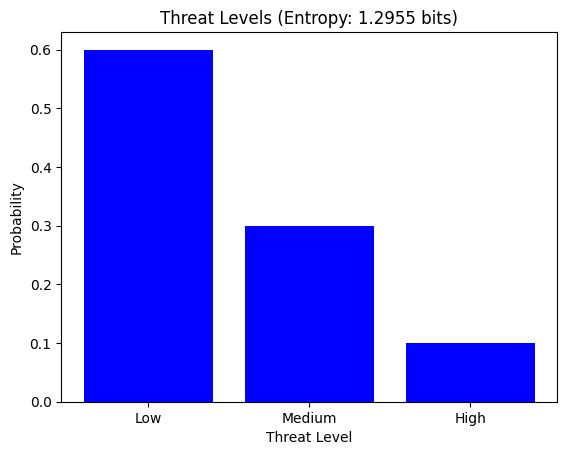

In [21]:

import matplotlib.pyplot as plt

# Simulated probabilities for different threat levels
threat_levels = ["Low", "Medium", "High"]
threat_probabilities = [0.6, 0.3, 0.1]

# Calculate entropy
entropy = -np.sum([p * np.log2(p) for p in threat_probabilities])

# Bar chart of threat probabilities
plt.bar(threat_levels, threat_probabilities, color='blue')
plt.title(f"Threat Levels (Entropy: {entropy:.4f} bits)")
plt.xlabel("Threat Level")
plt.ylabel("Probability")
plt.show()



In [22]:

import torch

# Simulated model and data
model = lambda x: x.sum(dim=1)  # Simple sum model
data = torch.tensor([[1.0, 2.0], [3.0, 4.0]])

# Adversarial noise generation
epsilon = 0.1
noise = epsilon * torch.randn_like(data)
adversarial_data = data + noise

# Outputs before and after attack
original_output = model(data)
adversarial_output = model(adversarial_data)

print(f"Original Output: {original_output}")
print(f"Adversarial Output: {adversarial_output}")



Original Output: tensor([3., 7.])
Adversarial Output: tensor([3.2845, 7.0694])


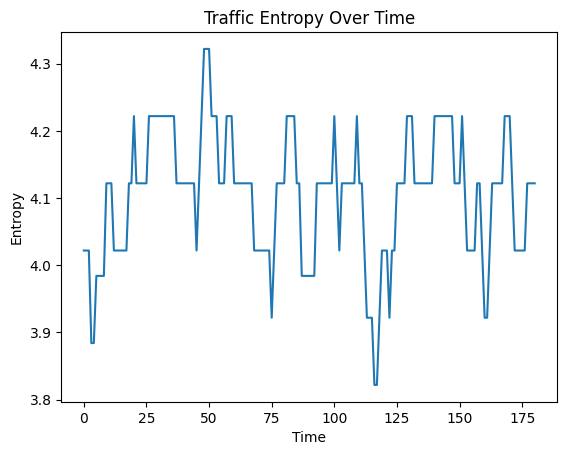

In [23]:

# Simulate network traffic
traffic = np.random.randint(1, 100, size=200)

# Calculate entropy over time
entropies = sliding_window_entropy(traffic, window_size=20)

# Visualize
plt.plot(entropies)
plt.title("Traffic Entropy Over Time")
plt.xlabel("Time")
plt.ylabel("Entropy")
plt.show()

